Initial setup

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%run "Common setup.ipynb"

C:\Users\douglasd\AppData\Local\Continuum\miniconda3\envs\biblio\lib\site-packages\fuzzywuzzy-0.17.0-py3.6.egg\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
RC = mk.RecordCollection("{}/rest_filtered_corpora.txt".format(TMP_DIR))

<hr> Convert manually sorted papers to dataframe

In [4]:
software_packages = pd.read_csv('{}/uasa_software_phrases_sorted_2019-03-01.csv'.format(DATA_DIR))

In [5]:
software_packages

,relevant,DOI,title,1,2,3,4,5
0,?,10.1117/1.JRS.7.073591,Determination of the overlap factor and its en...,The problem of overlap factor (OVF) computatio...,A sensitivity analysis is carried out as a fun...,Insertion of a field lens proves to be an eleg...,Parametric simulations are carried out to show...,The ray-tracing approach presented here is str...
1,No (not related to environment),10.1615/Int.J.UncertaintyQuantification.201601...,SOFTWARE RELIABILITY GROWTH MODEL WITH TEMPORA...,Increasingly software systems are developed to...,Based on a stochastic model of the software fa...,"To validate our model, we consider five partic...",Experimental comparisons with existing methods...,"Based on the stochastic model, the analytical ..."
2,?,10.2166/wqrjc.2011.028,A simulation of the fate of nitrogen in an on-...,"Following a sensitivity analysis, the model wa...",Modeling was performed with the GPS-X (TM) sof...,The calibrated model shows a good agreement wi...,Modeling of residential wastewater treatment a...,Obtained results show that the studied pilot u...
3,?,10.1002/2017WR020814,"A Practical, Robust Methodology for Acquiring ...",These predictions often contain a significant ...,Regional groundwater flow models play an impor...,One way to reduce this uncertainty is to colle...,The so-called Null-Space Monte Carlo method is...,The method incorporates any existing informati...
4,No (not related to environment),10.1002/cnm.2615,Verification of computational models of cardia...,"The field of 'verification, validation and unc...","The first stage, verification, is the evaluati...",These problems are carefully constructed so th...,For computational models of cardiac activity t...,We define D-D model problems with exact soluti...
5,No,10.1016/j.watres.2009.03.017,Nitritation performance and biofilm developmen...,Mathematical simulations of these two geometri...,The modeling simulations demonstrated that Ki ...,The experimental results showed that the count...,mg L-) and high pH (.-.,Sensitivity analysis results showed that the o...
6,?,10.1214/14-BA909,Sensitivity Analysis for Bayesian Hierarchical...,We propose a novel formal approach to prior se...,Other formal approaches to prior sensitivity a...,"Despite its importance, informal approaches to...",It quantifies sensitivity without the need for...,Prior sensitivity examination plays an importa...
7,Yes - NEVA,10.1007/s10584-014-1254-5,Non-stationary extreme value analysis in a cha...,The software presents the results of non-stati...,NEVA includes posterior probability intervals ...,This framework is implemented in the Non-stati...,We evaluate both stationary and non-stationary...,This paper introduces a framework for estimati...
8,Yes,10.1061/(ASCE)CP.1943-5487.0000239,Study of MEPDG Sensitivity Using Nonparametric...,Using four-layer pavement geometry [two asphal...,Because the new Mechanistic-Empirical Pavement...,"Instead, nonparametric regression procedures c...",Thirty inputs are used to randomly generate i...,"In addition to these, alligator cracking is hi..."
9,Yes - GUI-HDMR,10.1016/j.envsoft.2008.12.002,GUI-HDMR - A software tool for global sensitiv...,The developed GUI-HDMR software copes very wel...,GUI-HDMR can be applied to a wide range of app...,The high dimensional model representation (HDM...,The HDMR software described here combines the ...,The performance of the GUI-HDMR software has b...


In [6]:
software_rc = wosis.find_pubs_by_doi(RC, software_packages.DOI)

<hr>Analysing the software data
<br> - Keyword trend
<br> - Publication trend

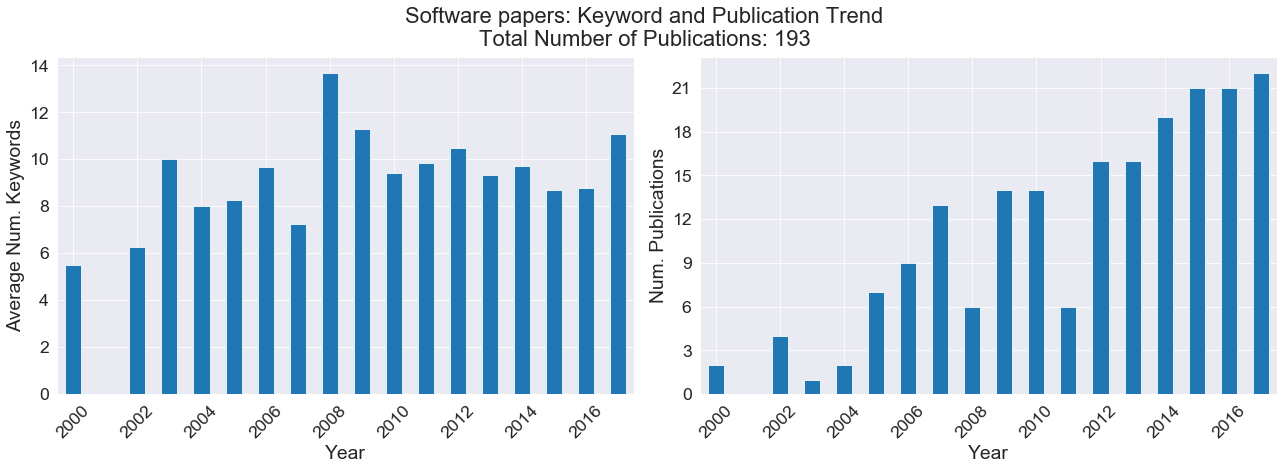

In [7]:
wos_plot.plot_kw_trend(software_rc, title='Software papers: Keyword and Publication Trend', 
                       save_plot_fn='{}/software_kw_trend.png'.format(FIG_DIR))

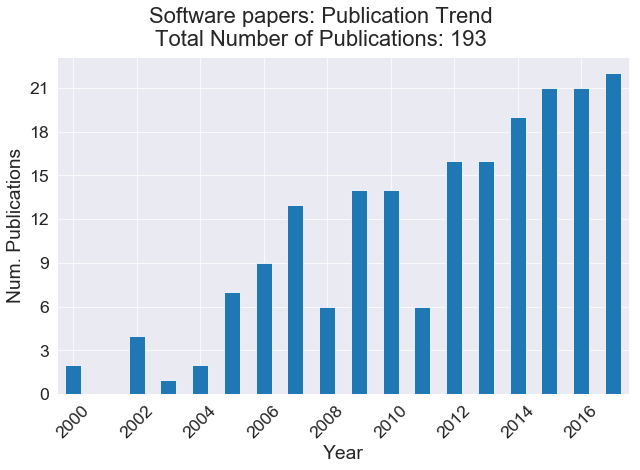

In [8]:
wos_plot.plot_pub_trend(software_rc, title='Software papers: Publication Trend', 
                        save_plot_fn='{}/software_pub_trend.png'.format(FIG_DIR))

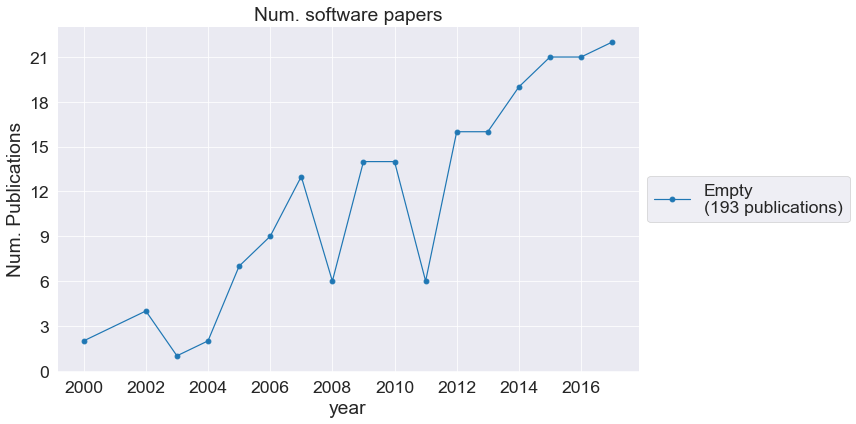

In [9]:
wos_plot.plot_topic_trend([software_rc], total_rc=False, title='Num. software papers', 
                          save_plot_fn='{}/software_topic_trend'.format(FIG_DIR))

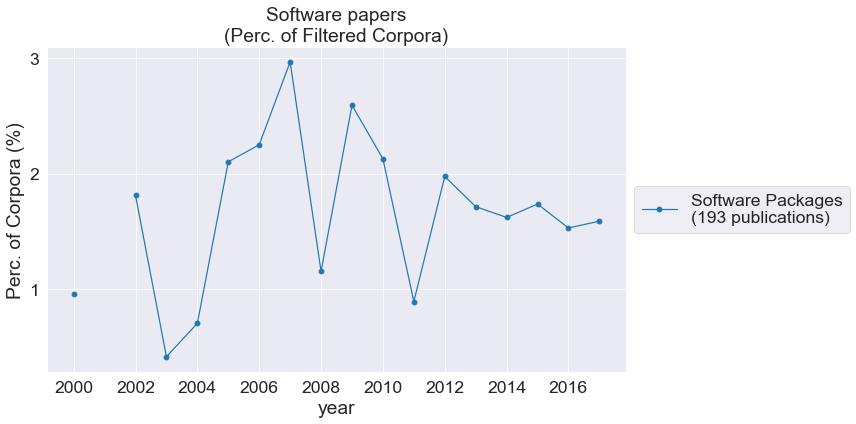

In [10]:
software_rc.name = 'Software Packages'
wos_plot.plot_topic_trend([software_rc], total_rc=RC, title='Software papers\n(Perc. of Filtered Corpora)', 
                          save_plot_fn='{}/software_topic_trend'.format(FIG_DIR))

<hr> 
   - Identifying UA/SA/optimization in the corpora <br>
   - Ploting keyword, publication, and topic trend

In [11]:
UQ = wosis.keyword_matches(software_rc, ['uncertainty analysis', 'ua', 'uncertainty quantification'], threshold=95.0)

In [12]:
all_uq = UQ.combine_recs()

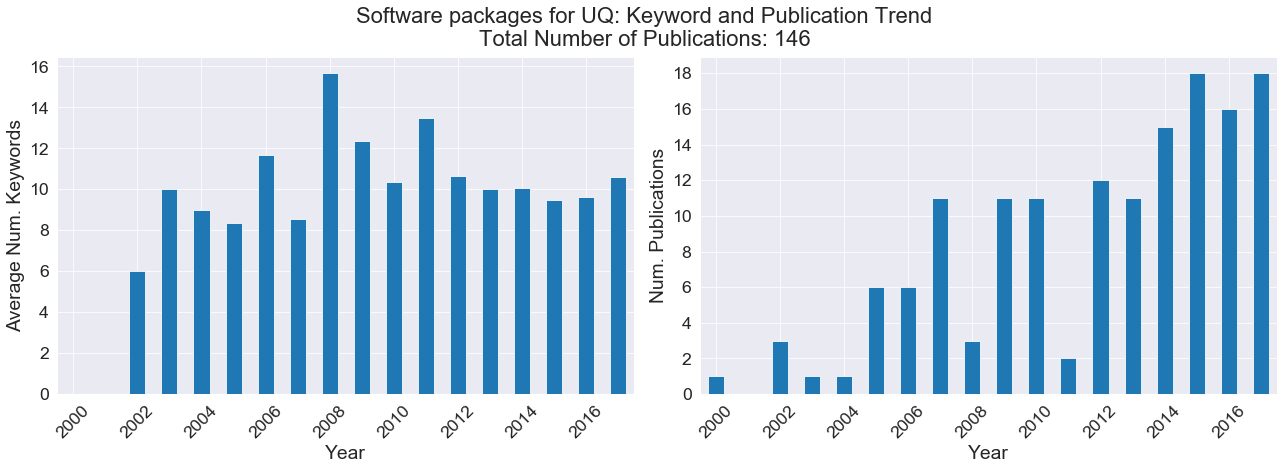

In [13]:
wos_plot.plot_kw_trend(all_uq, title='Software packages for UQ: Keyword and Publication Trend', 
                       save_plot_fn='{}/uq_pub_trend.png'.format(FIG_DIR))

In [14]:
SA = wosis.keyword_matches(software_rc, ['sensitivity analysis', 'sa'], threshold=95.0)

In [15]:
all_sa = SA.combine_recs()

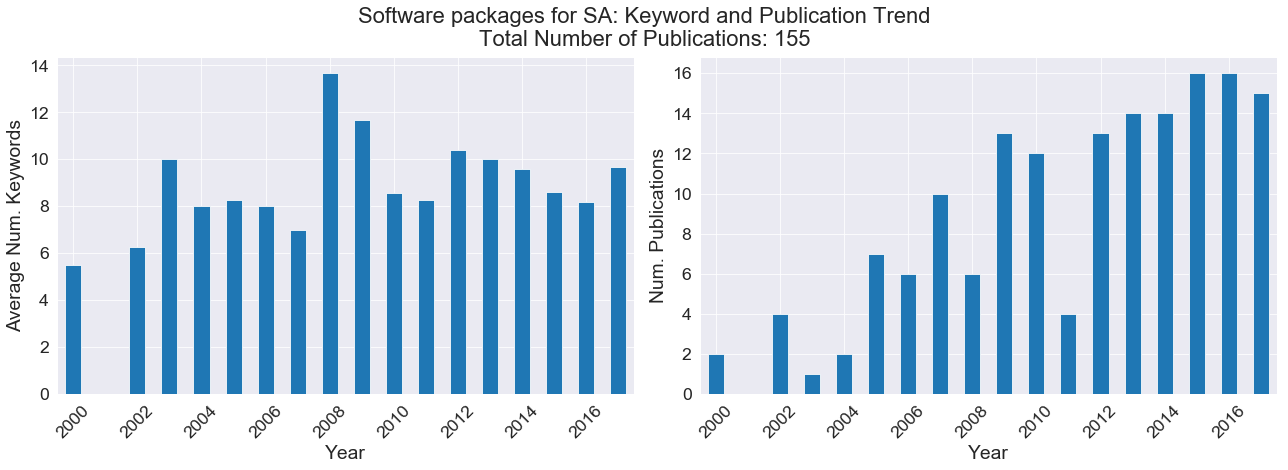

In [16]:
wos_plot.plot_kw_trend(all_sa, title='Software packages for SA: Keyword and Publication Trend', 
                       save_plot_fn='{}/sa_pub_trend.png'.format(FIG_DIR))

In [17]:
optimization = wosis.keyword_matches(software_rc, ['optimization'], threshold=95.0)

In [18]:
all_optimization = optimization.combine_recs()

In [19]:
all_opt_df = wosis.rc_to_df(all_optimization)
all_opt_df.loc[all_opt_df['year'] == 2007, 'title'].tolist()

['Methods and object-oriented software for FE reliability and sensitivity analysis with application to a bridge structure',
 'Parameter estimation and uncertainty analysis for a watershed model']

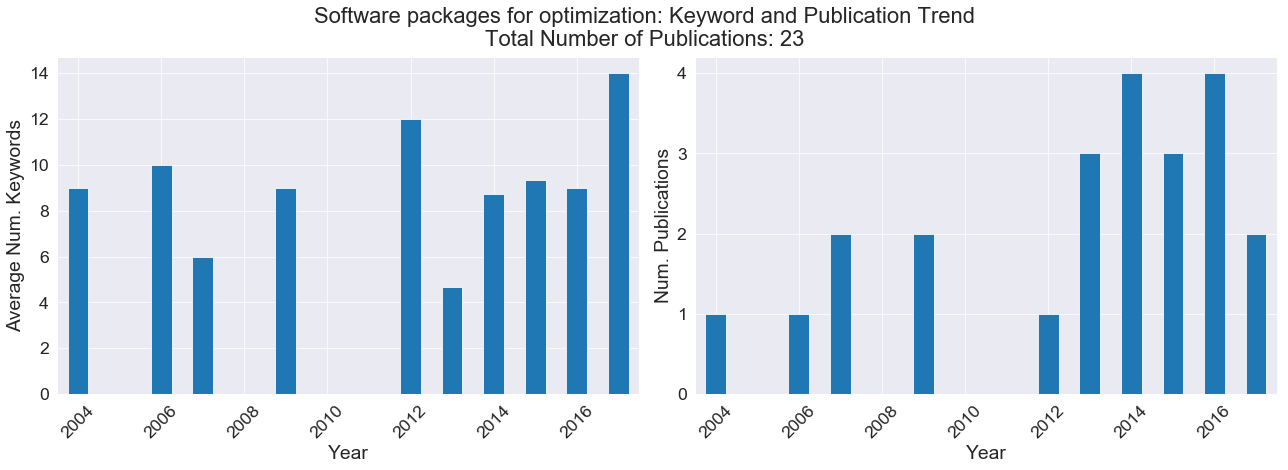

In [20]:
wos_plot.plot_kw_trend(all_optimization, title='Software packages for optimization: Keyword and Publication Trend', \
                       save_plot_fn='{}/opti_pub_trend.png'.format(FIG_DIR))

In [21]:
all_uq.name = 'UQ'
all_sa.name = 'SA'
#all_optimization.name = 'Optimization'

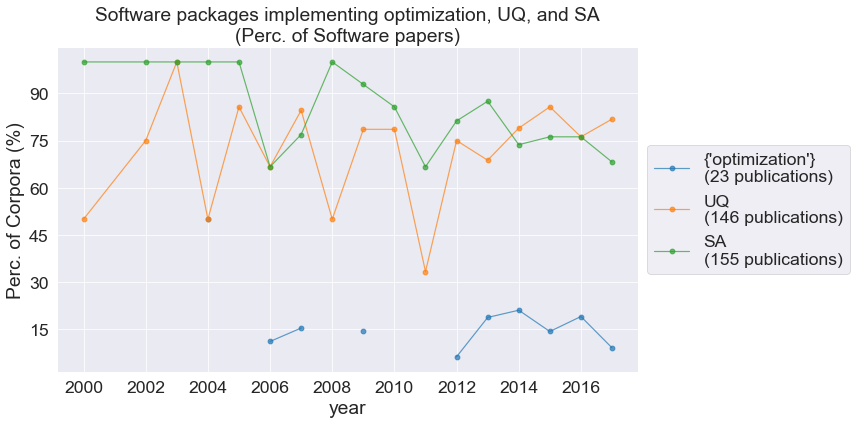

In [22]:
wos_plot.plot_topic_trend([all_optimization, all_uq, all_sa], total_rc=software_rc, 
                          title='Software packages implementing optimization, UQ, and SA\n(Perc. of Software papers)', 
                          save_plot_fn='{}/software_uasa_topics_keyword_trend_percentage.png'.format(FIG_DIR))

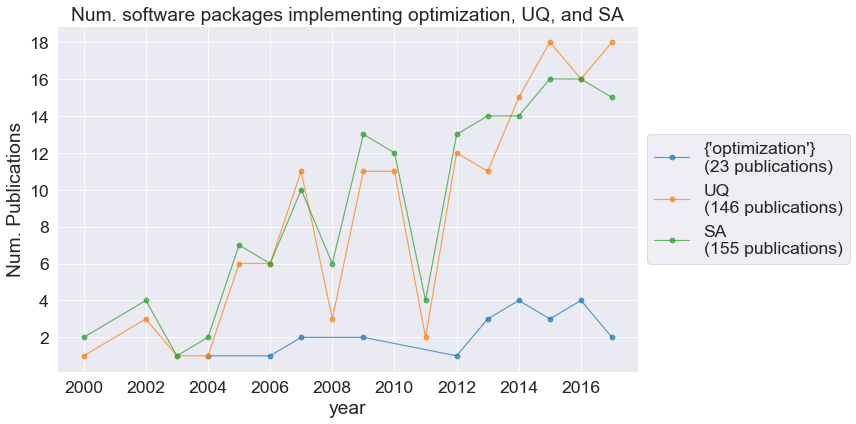

In [23]:
wos_plot.plot_topic_trend([all_optimization, all_uq, all_sa], 
                          title='Num. software packages implementing optimization, UQ, and SA', 
                          save_plot_fn='{}/software_uasa_topics_keyword_trend.png'.format(FIG_DIR))

<hr>
Plotting applications and software corpora on common axes to identify trends.

In [70]:
applications = pd.read_csv('{}/all_applications.csv'.format(DATA_DIR))

Error occured getting: WOS:000229668900012 does it exist in the RecordCollection?
Error occured getting: WOS:000414896200007 does it exist in the RecordCollection?


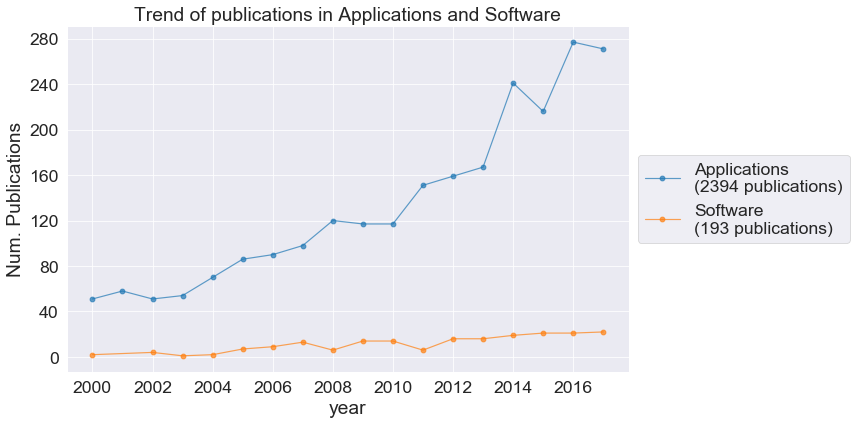

In [82]:
applications_rc = wosis.extract_recs(applications.id[:], RC)
applications_rc.name = 'Applications'
software_rc.name = 'Software'
wos_plot.plot_topic_trend([applications_rc, software_rc],
                          title='Trend of publications in Applications and Software',
                          save_plot_fn='{}/applications_software_trend.png'.format(FIG_DIR))

<hr> Running a key-phrase extraction on UA/SA/optimization to identify the fields using this software.

In [24]:
uq_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_uq))

In [25]:
uq_phrases.display_phrases()

A computer program for a Monte Carlo analysis of sensitivity in equations of environmental modelling obtained from experimental data (2002) 
https://dx.doi.org/10.1016/S0965-9978(02)00023-6 

The authors consider that it is useful to obtain new parameters that relate the sensitivity of the equations to the variations that are produced by the experimental data. 

On the other hand, they discuss a computing algorithm that allows the analysis of sensitivity (and stability) of the mathematical equations, which are built from any methodology. 

On the one hand, the authors present a theoretical study of sensitivity of the models according to different points of view. 

This will allow the selection of the model according to new criteria. 

An interface has been incorporated into this algorithm to allow a graphic visualisation of the effects that are produced when modifications of the model are carried out. 


Nitrous Oxide Emissions from Cropland: a Procedure for Calibrating the DayCent Bio

We simulated the pesticide entry on the landscape level at  sites in small streams situated in the central lowland of Germany with winter wheat, barley, and sugar beat as the main agricultural. 

We used the ratio of exposure to toxicity (REXTOX) model proposed by the OECD, which had been successfully validated in the study area as part of a previous study and which was extended to calculate pesticide concentrations in adjacent streams. 

A sensitivity analysis indicated that the most significant model parameters were the width of the no-application zone and the degree of plant interception. 

The prediction of runoff-related pesticide entry into surface waters on a landscape level usually requires considerable efforts with regard to input data, time, and personnel. 


Uncertainty analysis for regional-scale reserve selection (2006) 
https://dx.doi.org/10.1111/j.1523-1739.2006.00560.x 

Methods for reserve selection and conservation planning often ignore uncertainty. 

Because distribu

After a prospective evaluation of exposure at a workplace, a suitable monitoring program can be defined by the choice of measurement techniques and frequency of measurements. 


Understanding the Day Cent model: Calibration, sensitivity, and identifiability through inverse modeling (2015) 
https://dx.doi.org/10.1016/j.envsoft.2014.12.011 

(C)  The Authors. 

Inverse modeling tools are shown to be a powerful way to systematize and accelerate the process of biogeochemical model interrogation, improving our understanding of model function and the underlying ecosystem biogeochemical processes that they represent. 

Inverse modeling substantially reduced predictive model error relative to the default model for all model predictions, except for soil NO- and NH+. 


Stormwater pollutant loads modelling: epistemological aspects and case studies on the influence of field data sets on calibration and verification (2007) 
https://dx.doi.org/10.2166/wst.2007.090 

It is hard to find, if not impos

The detailed evaluation of mathematical models and the consideration of uncertainty in the modeling of hydrological and environmental systems are of increasing importance, and are sometimes even demanded by decision makers. 

At the same time, the growing complexity of models to represent real-world systems makes it more and more difficult to understand model behavior, sensitivities and uncertainties. 


A review of Bayesian belief networks in ecosystem service modelling (2013) 
https://dx.doi.org/10.1016/j.envsoft.2013.03.011 

However, the number of applications of BBNs in ESS modelling is still limited. 

A SWOT analysis highlights the advantages and disadvantages of BBNs in ESS modelling and pinpoints remaining challenges for future research. 

The existing BBN models are suited to describe, analyse, predict and value ESS. 

A wide range of quantitative and qualitative modelling research on ecosystem services (ESS) has recently been conducted. 


Simulation model for extended doubl

Based on the reduced mechanism and engine parameters, a D model of the engine was constructed with the Forte code. 

The findings showed that the addition of syngas could reduce the ignition delay time and increase the laminar flame speed. 

Based on the theory of direct relation graph (DRG) and the sensitivity analysis, a reduced mechanism for the diesel-syngas dual fuel was constructed. 


A model-independent Particle Swarm Optimisation software for model calibration (2013) 
https://dx.doi.org/10.1016/j.envsoft.2013.01.004 

This work presents and illustrates the application of hydroPSO, a novel multi-OS and model-independent R package used for model calibration. 

hydroPSO implements several state-of-the-art enhancements and fine-tuning options to the Particle Swarm Optimisation (PSO) algorithm to meet specific user needs. 

Although we limit the application of hydroPSO to hydrological models, flexibility of the package suggests it can be implemented in a wider range of models requi

A dynamic model that describes the mass transport and attenuation of odor-causing air emissions (i.e., hydrogen sulfide and other reduced sulfur compounds) in a biofiltration unit was developed and incorporated into a software package called Biofilter(TM). 

Model equations were converted to ordinary differential equations using orthogonal collocation and the resulting ordinary differential equations were solved using the DGEAR algorithm. 

internal diffusion and biofilm. 

Mechanisms included advective flow, mass transfer from the bulk phase to the biofilm, biofilm internal diffusion, and biological reaction in the biofilm. 


Comparison of different uncertainty techniques in urban stormwater quantity and quality modelling (2012) 
https://dx.doi.org/10.1016/j.watres.2012.02.009 

All non-Bayesian methods have problems with the way they accept behavioural parameter sets, e.g. 

These models are often conceptual and usually require calibration using local datasets. 

A part of that work

The field of 'verification, validation and uncertainty quantification' has been developed to evaluate the credibility of computational predictions. 


Pi 4U: A high performance computing framework for Bayesian uncertainty quantification of complex models (2015) 
https://dx.doi.org/10.1016/j.jcp.2014.12.006 

The optimization tasks associated with the asymptotic approximations are treated via the Covariance Matrix Adaptation Evolution Strategy (CMA-ES). 

The framework accommodates scheduling of multiple physical model evaluations based on an adaptive load balancing library and shows excellent scalability. 

In addition to the software framework, we also provide guidelines as to the applicability and efficiency of Bayesian tools when applied to computationally demanding physical models. 


Estimating storm discharge and water quality data uncertainty: A software tool for monitoring and modeling applications (2009) 
https://dx.doi.org/10.1016/j.envsoft.2008.12.006 

For storm loads, the 

Total dissolved solids and chloride (Cl-) measurements in open wells in the tannery cluster vary from , to , and , to , mg/l, respectively. 

Input to the chloride migration model was a groundwater flow model that considered steady and transient conditions. 


Groundwater fluxes in a shallow seasonal wetland pond: The effect of bathymetric uncertainty on predicted water and solute balances (2014) 
https://dx.doi.org/10.1016/j.jhydrol.2014.06.020 

We demonstrate that bathymetry can be successfully represented within the model in a simple parametric form using a cubic Sexier curve, allowing an assessment of bathymetric uncertainty due to measurement error and survey detail on the derived groundwater fluxes compared with the fixed bathymetry models. 

Water volume and solute mass balance models can be used in order to derive an estimate of groundwater fluxes within such systems. 

However, such fluxes are hard to quantify. 

We systematically quantify the uncertainty implications for eig

The proposed approach is tested and applied to quantify the fitting ability of an analytic volcanic source model on a synthetic deformation data. 


Conservation planning in forest landscapes of Fennoscandia and an approach to the challenge of Countdown 2010 (2007) 
https://dx.doi.org/10.1111/j.1523-1739.2007.00833.x 

Fennoscandia has experienced major loss of forest biodiversity caused by intensive forestry. 

To address the challenge of Countdown , a general framework for forest conservation planning in Fennoscandia needs to cover different conservation issues, tools, and data needs. 

The top % of priority areas contained over % of red-listed species locations and % of existing protected forest areas, but only % of these top priorities overlapped with core areas identified previously in a regional strategy that used more qualitative methods. 

As a contribution to meeting the challenge posed by Countdown , we developed a spatially explicit conservation-planning exercise that used r

Integrating environmental gap analysis with spatial conservation prioritization: A case study from Victoria, Australia (2012) 
https://dx.doi.org/10.1016/j.jenvman.2012.07.010 

Our method is based on the conversion of combinations of environmental variables into biodiversity features. 

The question remains of how to fill gaps in conservation systems efficiently. 

When it is applied to identify gaps in the coverage of environmental variables, it embodies the assumption that combinations of environmental variables are effective surrogates for biodiversity attributes. 

We also replicated the analysis by using Species Distribution Models (SDMs) as biodiversity features to evaluate the robustness and utility of our environment-based analysis. 

Gap analysis has been used to identify priorities for species and habitat types. 


Predicting the Long-Term Performance of a Structural Best Management Practice with the BMP ToolBox Model (2010) 
https://dx.doi.org/10.1089/ees.2009.0105 

The st

This model is used to evaluate and improve the system performance of some new commercial ME-TVC units with capacities of ., ., and . 

Results showed that the first effect was found to be responsible for about % of the total effects exergy destruction in Al-Jubail, compared to % in ALBA and % in Umm Al-Nar. 

Hence, this technology becomes highly attractive and competitive against multi stage flash desalination system. 

Large number of low temperature multi-effect thermal vapor compression (ME-TVC) desalination units have been installed recently in most of the GCC countries. 

A sensitivity analysis is also presented in this paper to investigate the system performance of Al-Jubail ME-TVC unit in KSA, which is considered as the largest ME-TVC desalination plant in the world. 


Sensitivity of population viability to spatial and nonspatial parameters using grip (2008) 
https://dx.doi.org/10.1890/07-1306.1 

We evaluated GRIP's performance as a tool for sensitivity analysis of spatial PV

https://dx.doi.org/10.1016/j.envsoft.2013.01.005 

We used a method of Bayesian analysis of computer code outputs (BACCO) with the Gaussian emulation machine for sensitivity analysis software (GEM-SA) to conduct a long-term SA of DNDC for predicting the annual change of soil organic carbon (dSOC), nitrous oxide emission (NO) and grain yield of spring wheat. 

Twenty seven non-weather input parameters with wide ranges were selected for SA using weather data recorded from Three Hills, Alberta over  years (-). 

In the second step of BACCO GEM-SA there were only three (in the case of dSOC) and six (in the cases of NO and yield) input parameters whose influence contributed to more than % of the total output variances by their total effects. 

This indicates that a single year SA may overestimate or underestimate a long-term parameter effect on the model prediction. 

Most of the  input parameters contributed little to the three outputs by the first step BACCO GEM-SA. 


Controlling setup c

Statistical inference is based on the assumption that data are missing completely at random or missing at random. 

Importantly, whether or not data are missing is assumed to be independent of the missing data. 

Missing data are common in studies that rely on multiple informant data to evaluate relationships among variables for distinguishable individuals clustered within groups. 

Estimation of structural equation models using raw data allows for incomplete data, and so all groups can be retained for analysis even if only  member of a group contributes data. 


Sensitivity Analysis for Bayesian Hierarchical Models (2015) 
https://dx.doi.org/10.1214/14-BA909 

We propose a novel formal approach to prior sensitivity analysis, which is fast and accurate. 

Other formal approaches to prior sensitivity analysis suffer from a lack of popularity in practice, mainly due to their high computational cost and absence of software implementation. 

Despite its importance, informal approaches to p

We increasingly rely on software-intensive embedded systems. 

One aspect of this evaluation is sensitivity analysis, which aims at identifying critical components of the architecture. 


Estimation of evapotranspiration from ground-based meteorological data and global land data assimilation system (GLDAS) (2015) 
https://dx.doi.org/10.1007/s00477-014-1004-2 

Comparison of the ETref gathered from observation and GLDAS revealed that both of them showed similar seasonal variation, although ETref calculated from GLDAS were underestimated. 

Results showed that the Penman (Proc R Soc Lond Ser A Math Phys Sci :-, ) FAO- Penman-Monteith,  Kpen equation (combination equations), the  Makkink, Priestley-Taylor equation (radiation based equation), and the  Hargreaves equation had a good overall rank. 

Using the six selected equations, seasonal analysis was conducted and evaluated using the bias and RMSE. 

In this study,  different equations provided in the Reference Evapotranspiration Calcula

The degradation of MTBE by Fenton's oxidation is predicted well by the model, as are the formation and degradation of byproducts, especially methyl acetate (MA) and tert-butyl alcohol (TBA). 


Environmental impact assessment based on dynamic fuzzy simulation (2014) 
https://dx.doi.org/10.1016/j.envsoft.2014.02.001 

A new "quick scan" method for an expert-/stakeholder-based impact assessment approach is introduced. 

This open modeling process also forms the basis of the credibility of the simulation results. 


Uncertainty analysis for estimation of landfill emissions and data sensitivity for the input variation (2010) 
https://dx.doi.org/10.1007/s10584-010-9919-1 

Landfills are the key source of CH() emissions in the emissions inventory of Slovakia, and the actual emission factors are estimated with a high uncertainty level. 

One of the sectors identified as a significant source of methane (CH()) emissions are solid waste disposal sites (SWDS). 

The results, sensitivity analysis,

https://dx.doi.org/10.1016/j.envsoft.2013.09.031 

For the Sobol' method, the minimum samples needed are  to compute the first-order and total sensitivity indices correctly. 

(C)  The Authors. 

All SA methods are tested using a variety of sampling techniques to screen out the most sensitive (i.e., important) parameters from the insensitive ones. 

Morris One-At-a-Time (MOAT) screening is the most efficient, needing only  samples to identify the most important parameters, but it is the least robust method. 

We use a newly developed software package, a Problem Solving environment for Uncertainty Analysis and Design Exploration (PSUADE), to evaluate the effectiveness and efficiency of ten widely used SA methods, including seven qualitative and three quantitative ones. 


Simulation of a workflow execution as a real Cloud by adding noise (2017) 
https://dx.doi.org/10.1016/j.simpat.2017.09.003 

Since our approach requires collecting data by executing the workflow in the Cloud in order t

In [26]:
sa_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_sa))

In [27]:
sa_phrases.display_phrases()

A computer program for a Monte Carlo analysis of sensitivity in equations of environmental modelling obtained from experimental data (2002) 
https://dx.doi.org/10.1016/S0965-9978(02)00023-6 

The authors consider that it is useful to obtain new parameters that relate the sensitivity of the equations to the variations that are produced by the experimental data. 

On the other hand, they discuss a computing algorithm that allows the analysis of sensitivity (and stability) of the mathematical equations, which are built from any methodology. 

On the one hand, the authors present a theoretical study of sensitivity of the models according to different points of view. 

This will allow the selection of the model according to new criteria. 

An interface has been incorporated into this algorithm to allow a graphic visualisation of the effects that are produced when modifications of the model are carried out. 


Nitrous Oxide Emissions from Cropland: a Procedure for Calibrating the DayCent Bio

An investigation is presented on the unsteady flow behaviour near the tongue region of a single-suction volute-type centrifugal pump with a specific speed of .. For this study, the flow through the test pump, which was available at laboratory, was simulated by means of a commercial CFD software that solved the Navier-Stokes equations for three-dimensional unsteady flow (D-URANS). 

A sensitivity analysis of the numerical model was performed in order to impose appropriate parameters regarding grid size, time step size and turbulence model. 

Once validated, the model was used to study the flow pulsations associated to the interaction between the impeller blades and the volute tongue as a function of the flow rate, for several flow rates ranging from % to % of the nominal flow rate. 


Estimates of plant density of wheat crops at emergence from very low altitude UAV imagery (2017) 
https://dx.doi.org/10.1016/j.rse.2017.06.007 

The application of the method on the  samples available over

In this study we took into consideration the uncertainties associated with a routine monitoring program in order to evaluate the minimum intake and dose detectable for a given level of confidence. 

Potential internal contaminations of workers are monitored by periodic bioassays interpreted in terms of intake and committed effective dose through biokinetic and dosimetric models. 

These techniques are implemented in the OPSCI software under development. 

Major sources of uncertainty are the contamination time, the size distribution and absorption into blood of the incorporated particles, and the measurement errors. 

After a prospective evaluation of exposure at a workplace, a suitable monitoring program can be defined by the choice of measurement techniques and frequency of measurements. 


Stormwater pollutant loads modelling: epistemological aspects and case studies on the influence of field data sets on calibration and verification (2007) 
https://dx.doi.org/10.2166/wst.2007.090 


The MCAT contains tools for the evaluation of performance, identitiability, sensitivity, predictive uncertainty and also allows for the testing of hypotheses with respect to the model structure used. 

The MCAT can be used off-line, i.e. 

The detailed evaluation of mathematical models and the consideration of uncertainty in the modeling of hydrological and environmental systems are of increasing importance, and are sometimes even demanded by decision makers. 

At the same time, the growing complexity of models to represent real-world systems makes it more and more difficult to understand model behavior, sensitivities and uncertainties. 


A review of Bayesian belief networks in ecosystem service modelling (2013) 
https://dx.doi.org/10.1016/j.envsoft.2013.03.011 

However, the number of applications of BBNs in ESS modelling is still limited. 

A SWOT analysis highlights the advantages and disadvantages of BBNs in ESS modelling and pinpoints remaining challenges for future research. 

T



Using a Monte Carlo approach to evaluate seawater intrusion in the Oristano coastal aquifer: A case study from the AQUAGRID collaborative computing platform (2009) 
https://dx.doi.org/10.1016/j.pce.2009.03.002 

in this study a stochastic approach has been employed to model hydraulic conductivity of a confining formation in a multi-layered coastal aquifer system, under conditions of uncertainty. 

Such analysis enables to take better decisions about the management of the groundwater resource and to make additional field investigations consistent with environmental protection. 

Uncertainties in the physical parameters of a groundwater system, due to the lack of direct access to the subsurface, strongly affect the design of water management policies, so that the risk of mismanagement becomes a critical factor in complex ecological and economic analyses. 

Stochastic modeling may help provide uncertainty quantification and also add robustness to the analysis by means of probabilistic f

The validity of calculations as well as the identification of the most important parameters is presented. 

Sensitivity analysis is used to identify the most important parameters in the DEEP model. 

Previous continuous development was culminated in the development of the DEEP . 

Throughout the years, the software was updated constantly. 

Such updates included the user interface and model structure but not the economic models. 


Optimization of biofiltration for odor control: Model development and parameter sensitivity (2002) 
https://dx.doi.org/10.2175/106143002X139703 

The model simulations showed that the existence of a water layer surrounding the biofilm in a biofiltration unit lowers the removal efficiency of hydrogen sulfide. 

A dynamic model that describes the mass transport and attenuation of odor-causing air emissions (i.e., hydrogen sulfide and other reduced sulfur compounds) in a biofiltration unit was developed and incorporated into a software package called Biofilter(

Modelling of groundwater infiltration into sewer systems (2013) 
https://dx.doi.org/10.1080/1573062X.2012.724077 

The hydrodynamic groundwater software MODFLOW is used to analyse the influencing variables of the infiltration processes. 

Monte Carlo simulations and the developed one-dimensional model are used to assess the leak area and the range of pressure loss in the vicinity of the pipe leaks. 

By additional sensitivity analysis it was found that the infiltration factor and the conductivity of the backfill are very important for the calculation of the leak area. 

Besides the hydraulic conductivity of the soil and the piezometric head in the vicinity of the sewer pipe, properties of the sewer trench, the shape and the size of leaks are important influencing factors. 


Verification of computational models of cardiac electro-physiology (2014) 
https://dx.doi.org/10.1002/cnm.2615 

These problems are carefully constructed so that they can be easily run using a general solver and ca

Direct computation methods are suggested for estimating the uncertainty components related to the vertical integration of velocity and to the transversal integration of velocity and depth. 

The new method appears to be more versatile than the ISO  method, and better suited to the diversity of streamgauging procedures. 


MINFIT: A Spreadsheet-Based Tool for Parameter Estimation in an Equilibrium Speciation Software Program (2016) 
https://dx.doi.org/10.1021/acs.est.6b03399 

Although there are existing tools available, the steep learning curve prevents the wider community of environmental engineers and chemists to adopt those tools. 

We developed interactive interfaces so that the optimization processes are transparent. 


MVC2: A MATLAB graphical interface toolbox for second-order multivariate calibration (2009) 
https://dx.doi.org/10.1016/j.chemolab.2009.02.005 

This work reports the release of Multivariate Calibration  (MVC), a MATLAB graphical interface toolbox for implementing 


Sensitivity analysis for volcanic source modeling quality assessment and model selection (2012) 
https://dx.doi.org/10.1016/j.cageo.2012.03.008 

The increasing knowledge and understanding of volcanic sources has led to the development and implementation of sophisticated and complex mathematical models with the main goal of describing field and experimental data. 

We also introduce a new criterion for model selection based on sensitivity analysis. 

Results show the validity of the method, against the traditional approaches, in supporting the volcanic model selection and the flexibility of the GSAT software tool in analyzing the model sensitivity. 

The proposed approach is tested and applied to quantify the fitting ability of an analytic volcanic source model on a synthetic deformation data. 


Determination of the overlap factor and its enhancement for medium-size tropospheric lidar systems: a ray-tracing approach (2013) 
https://dx.doi.org/10.1117/1.JRS.7.073591 

The ray-tracing 

There is potential for the model to be further simplified although more extensive model testing is required to ensure that such simplifications would not adversely impact on the utility of the toolbox. 

The hydrologic component showed strong non-linearity to the infiltration parameters of the CATCHCROP model, although this did not greatly impact estimates of total annual discharge. 

This paper explores sensitivities in the Biophysical Toolbox to the parameters of CATCHCROP as this component has the greatest potential for propagating errors though the Toolbox. 

In developing the individual models in the Biophysical Toolbox, emphasis was placed on limiting model complexity. 


MVC3: A MATLAB graphical interface toolbox for third-order multivariate calibration (2012) 
https://dx.doi.org/10.1016/j.chemolab.2012.03.018 

Model development and its subsequent application to unknown samples are straightforward from the interface. 

Multivariate calibration  (MVC) is a sequel of the already 

Modeling and quantitatively predicting software security based on stochastic Petri nets (2012) 
https://dx.doi.org/10.1016/j.mcm.2011.01.055 

The security prediction value is calculated based on the probability distribution of the MC in the steady state. 

To quantitatively predict software security in the design phase, hierarchical software security modeling and evaluation methods are proposed based on Stochastic Petri Nets (SPNs). 

An isomorphic Markov Chain (MC) is obtained from the component SPN model. 


Second law and sensitivity analysis of large ME-TVC desalination units (2015) 
https://dx.doi.org/10.1080/19443994.2013.852481 

This model is used to evaluate and improve the system performance of some new commercial ME-TVC units with capacities of ., ., and . 

Results showed that the first effect was found to be responsible for about % of the total effects exergy destruction in Al-Jubail, compared to % in ALBA and % in Umm Al-Nar. 

Hence, this technology becomes highly attra

The paper compares Chaospy to similar packages and demonstrates a stronger focus on defining reusable software building blocks that can easily be assembled to construct new, tailored algorithms for uncertainty quantification. 


SEVIRI PrePro: A novel software tool for the pre-processing of SEVIRI geostationary orbit EO data products (2016) 
https://dx.doi.org/10.1016/j.envsoft.2016.03.015 

From the sensor a series of operational products are also provided to the user's community at no cost via EUMETSAT or LSA SAF portals. 

Its use is anticipated to make a significant contribution to a large number of practical applications requiring use of SEVIRI data, including but not limited, weather forecasting and global climate monitoring at a range of geographical scales. 

Herein, an open access stand-alone software product developed in Java programming language is presented for automating key pre-processing steps to all the SEVIRI operationally distributed products. 

The development of SEV

Regional groundwater flow models play an important role in decision making regarding water resources; however, the uncertainty embedded in model parameters and model assumptions can significantly hinder the reliability of model predictions. 

One way to reduce this uncertainty is to collect new observation data from the field. 


Uncertainty analysis of hydrologic and water quality predictions for a small watershed using SWAT2000 (2003) 
https://dx.doi.org/10.1080/714044368 

Probability distribution functions (pdfs) for each of the  model simulations were constructed from these results. 

Developed probability distribution functions for the model provided information with desirable probability. 

This technique is applied to the Warner Creek watershed located in the Piedmont physiographic region of Maryland, and it provides an interval estimate of a range of values with an associated probability instead of a point estimate of a particular pollutant constituent. 

The uncertainty in pr

The objective of the work is to improve the manufacturing yield by tuning the parameters that significantly affect the yield. 

After the results were validated by the experts, we designed software that automates the critical parameter analysis process. 

Moreover, by applying the technique to the full list instead of the pre-selected list of the manufacturing parameters, we discovered that the parameters watch list previously identified by the experts should be adjusted to include some extra parameters. 

From our initial experiments, we found that the sensitivity analysis results were not sufficiently good and the interactions between parameters were not identified. 

This paper presents a technique for the critical parameter analysis of the disk drive manufacturing process. 


Comparing sensitivity analysis methods to advance lumped watershed model identification and evaluation (2007) 
https://dx.doi.org/10.5194/hess-11-793-2007 

This study seeks to identify sensitivity tools that 

Objects supported by DUE include spatial vectors, spatial rasters, time-series of spatial data, simple time-series and objects that are constant in space and time. 


NHPP software reliability model considering the uncertainty of operating environments with imperfect debugging and testing coverage (2017) 
https://dx.doi.org/10.1016/j.apm.2017.06.034 

Many NHPP software reliability growth models (SRGMs) have been developed to estimate the software reliability measures, but most of the underlying common assumptions of these models are that the operating environment is the same as the developing environment. 

Improved normalized criteria distance (NCD) method is also used to rank and select the best model in the context of a set of goodness-of-fit criteria taken all together. 

In this paper, a new model is proposed with the consideration of the fault detection rate based on the testing coverage and examined to cover ID subject to the uncertainty of operating environments. 

But in fact

Details on the implementation with the open-source software framework ALEA are presented; it is generic, and is based on available stiffness and mass matrices of a FEM for the deterministic, nonparametric nominal problem evaluated in the FEniCS environment. 

The reliability of the residual estimator is established. 

Asynchronous mesh adaptation for different gpc coefficients is permitted, subject to a minimal compatibility requirement on meshes used for different gpc coefficients. 

Numerical experiments in two spatial dimensions for membrane and plane stress boundary value problems on polygons are presented. 

A framework for residual-based a posteriori error estimation and adaptive mesh refinement and polynomial chaos expansion for general second order linear elliptic PDEs with random coefficients is presented. 


GIS-based applications of sensitivity analysis for sewer models (2012) 
https://dx.doi.org/10.2166/wst.2012.954 

Sensitivity analysis (SA) evaluates the impact of change

Where numerical models are employed as an aid to environmental management, the uncertainty associated with predictions made by such models must be assessed. 

Hence similar studies, or extensions of the present study, can be easily undertaken in other modeling contexts by other modelers. 

Nonlinear calibration-constrained optimization can also provide good estimates of parameter and predictive uncertainty, even in situations where the objective function surface is complex. 




In [28]:
opt_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_optimization))

In [29]:
opt_phrases.display_phrases()

Nitrous Oxide Emissions from Cropland: a Procedure for Calibrating the DayCent Biogeochemical Model Using Inverse Modelling (2013) 
https://dx.doi.org/10.1007/s11270-013-1677-z 

The aim of this study is to establish and demonstrate a procedure for calibration of DayCent to improve estimation of GHG emissions. 

Crop year  data were used for model calibration and  data were used for validation. 

The DayCent model was analysed and calibrated using NO flux data collected over  years at the Iowa State University Agronomy and Agricultural Engineering Research Farms, Boone, IA. 

After parameter estimation, the model underestimated the mean daily fluxes by  %. 

Sensitivity analysis performed provides important insights into the model structure providing guidance for model improvement. 


Exploring incomplete information in maintenance materials inventory optimization (2014) 
https://dx.doi.org/10.1108/IMDS-01-2013-0025 

A random sample of  inventory items was selected. 

Purpose Ensuring


Non-stationary extreme value analysis in a changing climate (2014) 
https://dx.doi.org/10.1007/s10584-014-1254-5 

The software presents the results of non-stationary extreme value analysis using various exceedance probability methods. 

This paper introduces a framework for estimating stationary and non-stationary return levels, return periods, and risks of climatic extremes using Bayesian inference. 

NEVA includes posterior probability intervals (uncertainty bounds) of estimated return levels through Bayesian inference, with its inherent advantages in uncertainty quantification. 

This framework is implemented in the Non-stationary Extreme Value Analysis (NEVA) software package, explicitly designed to facilitate analysis of extremes in the geosciences. 


Pi 4U: A high performance computing framework for Bayesian uncertainty quantification of complex models (2015) 
https://dx.doi.org/10.1016/j.jcp.2014.12.006 

The optimization tasks associated with the asymptotic approximations ar

We found expression-based models such as Simulink and GoldSim with Expressions were able to model the SWEB more accurately; however, stock and flow-based models such as STELLA, Madonna, and GoldSim with Flows provided the user a better conceptual understanding of the ecologic system. 

For both academic research and project management, understanding the benefits and limitations of systems-based software could improve the accuracy of results and enlarge the user audience. 

These constraints may include user demographics, budget limitations, built-in sensitivity and optimization tools, and the preference of user friendliness vs. computational power. 

Furthermore, the multitude of closed proprietary software may present a disservice to the modeling community, creating model artifacts that originate somewhere deep inside the undocumented features of the software, and masking the underlying properties of the model. 


Artificial neural networks to predict daylight illuminance in office bu

<hr> Top-cited journals for UA/SA/optimization
<br> - Original intention was to find top cited for each three collections, but there was significant overlap, so just ran the analysis on the entire refined_software collection

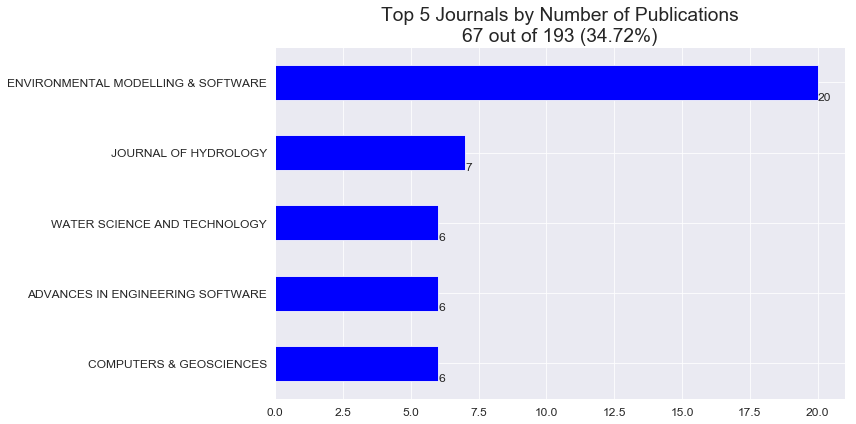

In [30]:
wos_plot.plot_pubs_per_journal(software_rc, top_n=5, annotate=True, show_stats=True, 
                               save_plot_fn='{}/software2_journal_pubs.png'.format(FIG_DIR))

In [31]:
journals_of_interest_software = list(map(str.upper, ['Environmental Modelling & Software', 'Journal of Hydrology', 
                                                     'Computers & Geosciences', 'Water Science and Technology', 
                                                     'Advances in Engineering Software']))

pubs_for_journals_software = wosis.find_pubs_by_journal(software_rc, journals_of_interest_software)

In [32]:
# Get citations for each paper
paper_citations_per_journal_software = {}
for journal in pubs_for_journals_software:
    fn = '{}/collection_software_{}_2019-03-08'.format(TMP_DIR, journal)
    paper_citations_per_journal_software[journal] = wosis.get_num_citations(pubs_for_journals_software[journal], 
                                                                            WOS_CONFIG,
                                                                            cache_as=fn)

In [33]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link']
collection_software = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_software.items():
    df = wosis.link_to_pub(df)
    df['journal'] = df['SO']
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)

    collection_software = collection_software.append(df[cols_of_interest][0:10], ignore_index=True)

In [34]:
top_cited_in_top_journals_software = collection_software.sort_values('citations', ascending=False)
top_cited_in_top_journals_software.head(10)

,AU,year,title,journal,citations,DOI link
26,"Ziehn, T|Tomlin, AS",2009,GUI-HDMR - A software tool for global sensitiv...,ENVIRONMENTAL MODELLING & SOFTWARE,121,https://dx.doi.org/10.1016/j.envsoft.2008.12.002
25,"Gallagher, M|Doherty, J",2007,Parameter estimation and uncertainty analysis ...,ENVIRONMENTAL MODELLING & SOFTWARE,121,https://dx.doi.org/10.1016/j.envsoft.2006.06.007
6,"Dixon, B",2005,Applicability of neuro-fuzzy techniques in pre...,JOURNAL OF HYDROLOGY,100,https://dx.doi.org/10.1016/j.jhydrol.2004.11.010
27,"Pianosi, F|Sarrazin, F|Wagener, T",2015,A Matlab toolbox for Global Sensitivity Analysis,ENVIRONMENTAL MODELLING & SOFTWARE,99,https://dx.doi.org/10.1016/j.envsoft.2015.04.009
0,"Vu-Bac, N|Lahmer, T|Zhuang, X|Nguyen-Thoi, T|R...",2016,A software framework for probabilistic sensiti...,ADVANCES IN ENGINEERING SOFTWARE,98,https://dx.doi.org/10.1016/j.advengsoft.2016.0...
28,"Landuyt, D|Broekx, S|D'hondt, R|Engelen, G|Aer...",2013,A review of Bayesian belief networks in ecosys...,ENVIRONMENTAL MODELLING & SOFTWARE,96,https://dx.doi.org/10.1016/j.envsoft.2013.03.011
29,"Wagener, T|Kollat, J",2007,Numerical and visual evaluation of hydrologica...,ENVIRONMENTAL MODELLING & SOFTWARE,87,https://dx.doi.org/10.1016/j.envsoft.2006.06.017
19,"Cannavo, F",2012,Sensitivity analysis for volcanic source model...,COMPUTERS & GEOSCIENCES,77,https://dx.doi.org/10.1016/j.cageo.2012.03.008
30,"Gan, YJ|Duan, QY|Gong, W|Tong, C|Sun, YW|Chu, ...",2014,A comprehensive evaluation of various sensitiv...,ENVIRONMENTAL MODELLING & SOFTWARE,76,https://dx.doi.org/10.1016/j.envsoft.2013.09.031
31,"Harmel, RD|Smith, DR|King, KW|Slade, RM",2009,Estimating storm discharge and water quality d...,ENVIRONMENTAL MODELLING & SOFTWARE,66,https://dx.doi.org/10.1016/j.envsoft.2008.12.006


In [35]:
top_cited_in_top_journals_software.to_csv('{}/top_cited_software_papers.csv'.format(DATA_DIR))

<hr> Searching a criteria match for areas which are applying these software packages, then using key-phrase extraction to identify whether the packages are being used for UA, SA, or optimization.

In [36]:
criteria = {
    'policy': set(['policy', 'adapt', 'decision support', 'management', 'gis']),
    'agri': set(['agricultur', 'farm']),
    'water': set(['hydrology', 'water', 'stream', 'aquifer']),
    'enviro': set(['environment', 'climate', 'ecology', 'ecosystem', 'biodivers', 'conservation']),
    'socio_economic': set(['ecosystem service', 'social', 'conflict', 'particip', 'law', 'stakehold', 'policy', 'economic']),
    'risk': set(['risk', 'risk management', 'hazard', 'control']),
    'medicine': set(['infection', 'disease', 'injury', 'medicine', 'cancer', 'treatment', 'health']),
    'chemistry': set(['chem', 'reaction', 'catalyst', 'isotope'])
}

crit_matches = wosis.keyword_matches_by_criteria(software_rc, criteria, threshold=95.0)

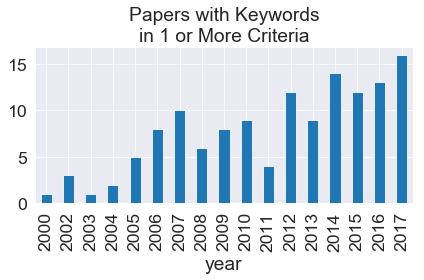

In [37]:
criteria_df = wosis.collate_keyword_criteria_matches(software_rc, crit_matches)
wos_plot.plot_criteria_trend(criteria_df, threshold=1)

In [38]:
policy = wosis.keyword_matches(software_rc, ['policy', 'adapt', 'decision support', 'management', 'gis'], threshold=95.0)

In [39]:
all_policy = policy.combine_recs()

In [40]:
policy_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_policy))

In [41]:
policy_phrases.display_phrases()

Infiltration under snow cover: Modeling approaches and predictive uncertainty (2017) 
https://dx.doi.org/10.1016/j.jhydrol.2016.12.042 

Further, our study demonstrated that an uncertainty analysis of model predictions is easily accomplished due to the low computational demand of the models and efficient calibration software and is absolutely worth the additional investment. 

Therefore, we established a snowmelt model calibration dataset that is both temporally dense and represents the integrated snowmelt infiltration signal for the Vers Chez le Brandt research catchment, which functions as a rather unique natural lysimeter. 

Lastly, development of a systematic instrumentation that evaluates the distributed, temporal evolution of snowpack drainage is vital for optimal understanding and management of cold-climate hydrologic systems. 

This is extremely important because the rate and timing of snowpack drainage has substantial consequences to aquifer recharge patterns, which in turn af

Comparison of different uncertainty techniques in urban stormwater quantity and quality modelling (2012) 
https://dx.doi.org/10.1016/j.watres.2012.02.009 

All non-Bayesian methods have problems with the way they accept behavioural parameter sets, e.g. 

These models are often conceptual and usually require calibration using local datasets. 

A part of that work is the assessment and comparison of different techniques generally used in the uncertainty assessment of the parameters of water models. 

number of iterations required to generate the probability distribution of parameters), it was found that SCEM-UA and AMALGAM produce results quicker than GLUE in terms of required number of simulations. 

The quantification of the uncertainty associated with the models is a must, although it is rarely practiced. 


Predicting the Long-Term Performance of a Structural Best Management Practice with the BMP ToolBox Model (2010) 
https://dx.doi.org/10.1089/ees.2009.0105 

The study applied the B

https://dx.doi.org/10.1007/s00477-014-1004-2 

Comparison of the ETref gathered from observation and GLDAS revealed that both of them showed similar seasonal variation, although ETref calculated from GLDAS were underestimated. 

Results showed that the Penman (Proc R Soc Lond Ser A Math Phys Sci :-, ) FAO- Penman-Monteith,  Kpen equation (combination equations), the  Makkink, Priestley-Taylor equation (radiation based equation), and the  Hargreaves equation had a good overall rank. 

Using the six selected equations, seasonal analysis was conducted and evaluated using the bias and RMSE. 

In this study,  different equations provided in the Reference Evapotranspiration Calculator Software (REF-ET) were utilized for estimating ETref with GLDAS and point scale data collected at  observation sites in the Korean Peninsula during . 


A New Software Reliability Growth Model: Multigeneration Faults and a Power-Law Testing-Effort Function (2016) 
https://dx.doi.org/10.1155/2016/9276093 

For t

As a contribution to meeting the challenge posed by Countdown , we developed a spatially explicit conservation-planning exercise that used regional knowledge on forest biodiversity to provide support for managers attempting to halt further loss of biological diversity in the region. 

Effective management of biodiversity in production landscapes requires a conservation approach that acknowledges the complexity of ecological and cultural systems in time and space. 


An environmental and economic analysis for geotube coastal structures retaining dredge material (2012) 
https://dx.doi.org/10.1016/j.resconrec.2012.01.011 

() on the economic aspects of geotube technology and identifies the optimum method of construction for each type of coastal structure. 

In general, the larger the scale of the project the greater the potential savings in CO emissions and cost that can be achieved through the use of geotube technology. 

The analyses highlight that the size of the structure and the dist

The novelty of this paper is a geo-referenced visualization of sensitivity indices for model parameters in a combined sewer model using geographic information system (GIS) software. 

The result is a collection of maps for each analysis, where sensitivity indices (calculated for model parameters of interest) are illustrated according to a predefined symbology. 


Sensitivity Analysis of Land Unit Suitability for Conservation Using a Knowledge-Based System (2010) 
https://dx.doi.org/10.1007/s00267-010-9520-4 

We constructed two fuzzy logic-based knowledge bases to determine the conservation suitability of land units in the interior Columbia River basin using NetWeaver software in the Ecosystem Management Decision Support application framework. 

The availability of spatially continuous data layers can have a strong impact on selection of land units for conservation purposes. 

Our objective was to assess the sensitivity of suitability ratings, derived from evaluating the knowledge base

We further illustrate the application of hydroPSO in two real-world case studies: we calibrate, first, a hydrological model for the Ega River Basin (Spain) and, second, a groundwater flow model for the Pampa del Tamarugal Aquifer (Chile). 


Application of the Morris algorithm for sensitivity analysis of the REALM model for the Goulburn irrigation system (2006) 
https://dx.doi.org/10.1007/s10666-005-9029-z 

The REALM modelling shell is widely used in Australia as a water allocation modelling tool. 

The Goulburn is more sensitive to some of the numerical convergence parameters used in the allocation software, while the Broken is less sensitive to these factors. 

REALM represents the river and irrigation system as a network of storages and carriers. 

The model has been optimised to best represent the water harvesting and allocation for use by water management authorities. 

The numerical convergence factors also lead to important second-order effects. 


Parameter estimation and unce

In [42]:
agri = wosis.keyword_matches(software_rc, ['agricultur', 'farm'], threshold=95.0)

In [43]:
all_agri = agri.combine_recs()

In [44]:
agri_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_agri))

In [45]:
agri_phrases.display_phrases()

Nitrous Oxide Emissions from Cropland: a Procedure for Calibrating the DayCent Biogeochemical Model Using Inverse Modelling (2013) 
https://dx.doi.org/10.1007/s11270-013-1677-z 

The aim of this study is to establish and demonstrate a procedure for calibration of DayCent to improve estimation of GHG emissions. 

Crop year  data were used for model calibration and  data were used for validation. 

The DayCent model was analysed and calibrated using NO flux data collected over  years at the Iowa State University Agronomy and Agricultural Engineering Research Farms, Boone, IA. 

After parameter estimation, the model underestimated the mean daily fluxes by  %. 

Sensitivity analysis performed provides important insights into the model structure providing guidance for model improvement. 


Plant Modelling Framework: Software for building and running crop models on the APSIM platform (2014) 
https://dx.doi.org/10.1016/j.envsoft.2014.09.005 

(C)  The Authors. 

The PMF contains a top-level P

In [46]:
water = wosis.keyword_matches(software_rc, ['hydrology', 'water', 'stream', 'aquifer'], threshold=95.0)

In [47]:
all_water = water.combine_recs()

In [48]:
water_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_water))

In [49]:
water_phrases.display_phrases()

Infiltration under snow cover: Modeling approaches and predictive uncertainty (2017) 
https://dx.doi.org/10.1016/j.jhydrol.2016.12.042 

Further, our study demonstrated that an uncertainty analysis of model predictions is easily accomplished due to the low computational demand of the models and efficient calibration software and is absolutely worth the additional investment. 

Therefore, we established a snowmelt model calibration dataset that is both temporally dense and represents the integrated snowmelt infiltration signal for the Vers Chez le Brandt research catchment, which functions as a rather unique natural lysimeter. 

Lastly, development of a systematic instrumentation that evaluates the distributed, temporal evolution of snowpack drainage is vital for optimal understanding and management of cold-climate hydrologic systems. 

This is extremely important because the rate and timing of snowpack drainage has substantial consequences to aquifer recharge patterns, which in turn af

The computational domain included three zones, which are the vapor space above and below the demister and the demister. 

Findings - Sensitivity analysis of the model showed the main parameters that affect demister performance are the vapor velocity and the demister permeability. 


Uncertainty analysis of hydrologic and water quality predictions for a small watershed using SWAT2000 (2003) 
https://dx.doi.org/10.1080/714044368 

Probability distribution functions (pdfs) for each of the  model simulations were constructed from these results. 

Developed probability distribution functions for the model provided information with desirable probability. 

This technique is applied to the Warner Creek watershed located in the Piedmont physiographic region of Maryland, and it provides an interval estimate of a range of values with an associated probability instead of a point estimate of a particular pollutant constituent. 

The uncertainty in predicted stream flow and sediment loading is larg

We used the ratio of exposure to toxicity (REXTOX) model proposed by the OECD, which had been successfully validated in the study area as part of a previous study and which was extended to calculate pesticide concentrations in adjacent streams. 

A sensitivity analysis indicated that the most significant model parameters were the width of the no-application zone and the degree of plant interception. 

The prediction of runoff-related pesticide entry into surface waters on a landscape level usually requires considerable efforts with regard to input data, time, and personnel. 


The effect of field conditions on low Reynolds number flow in a wetland (2009) 
https://dx.doi.org/10.1016/j.watres.2008.10.027 

The present study examines the effect of field conditions on diffusion in a laminar flow field and verifies the diffusion model created by Nepf, H.M. [. 

A model for diffusion within emergent vegetation. 

Drag, turbulence, and diffusion in flow through emergent vegetation. 

Drag, tu

https://dx.doi.org/10.1080/1573062X.2016.1254259 

The high variability of the results of the comparison suggests the use of the LID Editor rain barrel option for long-term simulation but not for single event analysis. 

of the EPA storm water management model (SWMM) software does not allow the consideration of demand-driven behaviour of domestic rain water harvesting (RWH) systems to evaluate their runoff retention potential. 

The low-impact development (LID) Editor rain barrel option of release . 

A sensitivity analysis revealed that the overestimation provided by the rain barrel option is significant for tanks smaller than m(), tank sizes of major diffusion for domestic RWH. 

The comparison showed the LID Editor-based model to generally overestimate the benchmark model in the evaluation of both volumetric and peak retention efficiency. 


Using an ensemble smoother to evaluate parameter uncertainty of an integrated hydrological model of Yanqi basin (2015) 
https://dx.doi.org/10.1

In this study,  different equations provided in the Reference Evapotranspiration Calculator Software (REF-ET) were utilized for estimating ETref with GLDAS and point scale data collected at  observation sites in the Korean Peninsula during . 


Model development and process simulation of postcombustion carbon capture technology with aqueous AMP/PZ solvent (2016) 
https://dx.doi.org/10.1016/j.ijggc.2016.01.021 

g/t CO to . 

The uncertainty analysis shows that the model is well capable of predicting experimental and pilot result. 

GJ/t CO. Only amine slip to the atmosphere increases with AMP/PZ technology: from . 

This study presents the development, application, and uncertainty analysis of a process simulation model for postcombustion CO capture with an AMP/PZ solvent blend based on state of the art knowledge on AMP/PZ solvent technology. 

The model was applied to a case study of postcombustion CO capture from an Advanced Super Critical Pulverized Coal power plant. 


Gulf war cont

The approach to model development used in this work employs repeated analysis using sensitivity and inverse methods, including use of a new observation-stacked parameter importance graph. 


An environmental and economic analysis for geotube coastal structures retaining dredge material (2012) 
https://dx.doi.org/10.1016/j.resconrec.2012.01.011 

() on the economic aspects of geotube technology and identifies the optimum method of construction for each type of coastal structure. 

In general, the larger the scale of the project the greater the potential savings in CO emissions and cost that can be achieved through the use of geotube technology. 

The analyses highlight that the size of the structure and the distance to the source of the quarry material are crucial factors in determining the optimum construction method. 

This paper investigates the environmental and economic sensitivity of coastal structures for two different construction methods: a traditional rubble mound structure an


Groundwater fluxes in a shallow seasonal wetland pond: The effect of bathymetric uncertainty on predicted water and solute balances (2014) 
https://dx.doi.org/10.1016/j.jhydrol.2014.06.020 

We demonstrate that bathymetry can be successfully represented within the model in a simple parametric form using a cubic Sexier curve, allowing an assessment of bathymetric uncertainty due to measurement error and survey detail on the derived groundwater fluxes compared with the fixed bathymetry models. 

Water volume and solute mass balance models can be used in order to derive an estimate of groundwater fluxes within such systems. 

However, such fluxes are hard to quantify. 

We systematically quantify the uncertainty implications for eight different representations of wetland bathymetry for a shallow seasonal wetland pond in South Australia. 

However, the shallow nature of seasonal wetland ponds means water volume and surface area can change rapidly and non-linearly with depth, requiring an 

This paper explores the use of three such methods, and compares their performance when used in conjunction with a lumped parameter model for surface water flow (HSPF) in a large watershed. 

As well as this, they can provide the modeler with valuable qualitative information on the shape of parameter and predictive probability distributions; these shapes can be quite complex, especially where local objective function optima lie within those parts of parameter space that are considered probable after calibration has been undertaken. 

Where numerical models are employed as an aid to environmental management, the uncertainty associated with predictions made by such models must be assessed. 

Hence similar studies, or extensions of the present study, can be easily undertaken in other modeling contexts by other modelers. 

Nonlinear calibration-constrained optimization can also provide good estimates of parameter and predictive uncertainty, even in situations where the objective function su

In [50]:
enviro = wosis.keyword_matches(software_rc, ['environment', 'climate', 'ecology', 'ecosystem', 'biodivers', 'conservation'], threshold=95.0)

In [51]:
all_enviro = enviro.combine_recs()

In [52]:
enviro_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_enviro))

In [53]:
enviro_phrases.display_phrases()

A computer program for a Monte Carlo analysis of sensitivity in equations of environmental modelling obtained from experimental data (2002) 
https://dx.doi.org/10.1016/S0965-9978(02)00023-6 

The authors consider that it is useful to obtain new parameters that relate the sensitivity of the equations to the variations that are produced by the experimental data. 

On the other hand, they discuss a computing algorithm that allows the analysis of sensitivity (and stability) of the mathematical equations, which are built from any methodology. 

On the one hand, the authors present a theoretical study of sensitivity of the models according to different points of view. 

This will allow the selection of the model according to new criteria. 

An interface has been incorporated into this algorithm to allow a graphic visualisation of the effects that are produced when modifications of the model are carried out. 


Simulation modeling of soil and plant nitrogen use in a potato cropping system in 

Plant Modelling Framework: Software for building and running crop models on the APSIM platform (2014) 
https://dx.doi.org/10.1016/j.envsoft.2014.09.005 

(C)  The Authors. 

The PMF contains a top-level Plant class that provides an interface with the APSIM model environment and controls the other classes in the plant model. 

Four examples are included to demonstrate the flexibility of application of the PMF; . 

A plant configuration file specifies which mid-level and Function classes are to be included and how they are to be arranged and parameterised to represent a particular crop model. 

These examples show the PMF can be used to develop models of different complexities and allows flexibility in the approach for implementing crop physiology concepts into model set up. 


Parameter sensitivity analysis of a 1-D cold region lake model for land-surface schemes (2017) 
https://dx.doi.org/10.5194/hess-21-6345-2017 

The generalized likelihood uncertainty estimation (GLUE) was applied t

A sensitivity analysis of the input parameters was also carried out and the parameters were categorized by their sensitivity index (SI). 


Analyzing the effects of geological and parameter uncertainty on prediction of groundwater head and travel time (2013) 
https://dx.doi.org/10.5194/hess-17-3245-2013 

Uncertainty of groundwater model predictions has in the past mostly been related to uncertainty in the hydraulic parameters, whereas uncertainty in the geological structure has not been considered to the same extent. 

In the second scenario the same  geological models were subjected to model optimization, where the hydraulic parameters for each of them were estimated by calibration against observations of hydraulic head and stream discharge. 

In the third scenario each geological model was run with  randomized sets of parameters. 

The analysis documented that the uncertainty on the conceptual geological model was as significant as the uncertainty related to the embedded hydraulic p

With these benefits in mind, the Data Uncertainty Estimation Tool for Hydrology and Water Quality (DUET-H/WQ) was developed from an existing uncertainty estimation framework for small watershed discharge, sediment, and N and P data. 

When these uncertainty estimates for individual values were aggregated within study periods (i.e. 

DUET-H/WQ lists published uncertainty information for data collection procedures to assist the user in assigning appropriate data-specific uncertainty estimates and then calculates the uncertainty for individual discharge, concentration, and load values. 


NHPP software reliability model considering the uncertainty of operating environments with imperfect debugging and testing coverage (2017) 
https://dx.doi.org/10.1016/j.apm.2017.06.034 

Many NHPP software reliability growth models (SRGMs) have been developed to estimate the software reliability measures, but most of the underlying common assumptions of these models are that the operating environment is 

Furthermore, such a development could stimulate the transfer of systems analytical techniques between different fields of application. 

A simple interface between simulation programs and systems analytical software is proposed. 

The proposed concept, consisting of a text file interface combined with a batch mode simulation program call, is independent of model structure, operating system and programming language. 


GUI-HDMR - A software tool for global sensitivity analysis of complex models (2009) 
https://dx.doi.org/10.1016/j.envsoft.2008.12.002 

The size of the set of samples is however dependent on the problem and can be successively increased if additional accuracy is required. 

The developed GUI-HDMR software copes very well with the test cases and sensitivity indices of first and second order could be calculated accurately with only low computational effort. 

Extensions to the existing set of random sampling (RS)-HDMR tools have been developed in order to make the method mo

Water volume and solute mass balance models can be used in order to derive an estimate of groundwater fluxes within such systems. 

However, such fluxes are hard to quantify. 

We systematically quantify the uncertainty implications for eight different representations of wetland bathymetry for a shallow seasonal wetland pond in South Australia. 

However, the shallow nature of seasonal wetland ponds means water volume and surface area can change rapidly and non-linearly with depth, requiring an accurate representation of the wetland pond bathymetry. 


Modeling Nitrogen Dynamics in a Waste Stabilization Pond System Using Flexible Modeling Environment with MCMC (2017) 
https://dx.doi.org/10.3390/ijerph14070765 

This study presents an approach for obtaining realization sets of parameters for nitrogen removal in a pilot-scale waste stabilization pond (WSP) system. 

The proposed approach was designed for optimal parameterization, local sensitivity analysis, and global uncertainty analysi

The method was evaluated via specific programming language software packages, and was applied to select natural wastewater treatment alternatives in a case study. 

Results indicate the stabilization pond was the optimal alternative among five natural wastewater treatment systems. 


Natural ventilation design: An analysis of predicted and measured performance (2014) 
https://dx.doi.org/10.1016/j.buildenv.2014.06.009 

The improved model's natural ventilation performance predictions were significantly more accurate than those of the first draft early-stage-design model that employed model assumptions typical during initial design. 

This process highlighted significant limitations in the EnergyPlus software's models of occupant-driven window control. 

We conclude with recommendations on key design parameters including window control, wind pressure coefficients and weather data resolution to help improve early-design-stage predictions of natural ventilation performance using EnergyPlus

In [54]:
socio_ec = wosis.keyword_matches(software_rc, ['ecosystem service', 'social', 'conflict', 'particip', 'law', 'stakehold', 'policy', 'economic'], threshold=95.0)

In [55]:
all_socio_ec = socio_ec.combine_recs()

In [56]:
socio_ec_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_socio_ec))

In [57]:
socio_ec_phrases.display_phrases()

The boundary-quality penalty: a quantitative method for approximating species responses to fragmentation in reserve selection (2007) 
https://dx.doi.org/10.1111/j.1523-1739.2006.00625.x 

We implemented the BQP in the context of the Zonation method, but it could as well be implemented into any other spatially explicit reserve-planning framework. 

Therefore, many reserve-design methods use qualitative heuristics, such as distance-based criteria or boundary-length penalties to induce reserve aggregation. 

We devised a quantitative method that introduces aggregation into reserve networks. 

The BQP can be estimated for any habitat model that includes neighborhood (connectivity) effects, and it can be introduced into reserve selection software in a standardized manner We used the BQP in a reserve-design case study of the Hunter Valley of southeastern Australia. 


A New Software Reliability Growth Model: Multigeneration Faults and a Power-Law Testing-Effort Function (2016) 
https://dx.do

The design yields . 

The design and analysis is based on research at NREL, other national laboratories, and The Dow Chemical Company, and it incorporates commercial technologies, process modeling using Aspen Plus software, equipment cost estimation, and discounted cash flow analysis. 


Controlling setup cost in (Q, r, L) inventory model with defective items (2010) 
https://dx.doi.org/10.1016/j.apm.2009.04.010 

Finally we develop two computational algorithms to obtain the optimal ordering policy, A computer code using the software Matlab is developed to derive the optimal solution and present numerical examples to illustrate the models. 

This study discusses a mixture inventory model with back orders and lost sales in which the order quantity, reorder point, lead time and setup cost are decision variables. 

Additionally, sensitivity analysis is conducted with respect to the various system parameters. 


UNCERTAINTY IN THE DEVELOPMENT AND USE OF EQUATION OF STATE MODELS (2013) 
http

In [58]:
med = wosis.keyword_matches(software_rc, ['infection', 'disease', 'injury', 'medicine', 'cancer', 'treatment', 'health'], threshold=95.0)

In [59]:
all_med = med.combine_recs()

In [60]:
med_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_med))

In [61]:
med_phrases.display_phrases()

A review of Bayesian belief networks in ecosystem service modelling (2013) 
https://dx.doi.org/10.1016/j.envsoft.2013.03.011 

However, the number of applications of BBNs in ESS modelling is still limited. 

A SWOT analysis highlights the advantages and disadvantages of BBNs in ESS modelling and pinpoints remaining challenges for future research. 

The existing BBN models are suited to describe, analyse, predict and value ESS. 

A wide range of quantitative and qualitative modelling research on ecosystem services (ESS) has recently been conducted. 


A Computational Fluid Dynamic Model for Prediction of Organic Dyes Adsorption from Aqueous Solutions (2012) 
https://dx.doi.org/10.1007/s10666-012-9310-x 

The experimental results presented in this study and taken from the literature for the removal of synthetic dyes were compared with those results predicted by the numerical model. 

This effect is most obvious at the early stages of the adsorption process when the rate of dye removal is

The accuracy of the optimised parameters was assessed against experimental data from a second lab-scale reactor treating EC effluent with an additional carbon source (molasses). 

It was concluded that the model predicted reasonably the dynamic behaviour of the anaerobic reactor under different loading rates. 


INTEGRATION OF UNCERTAINTIES INTO INTERNAL CONTAMINATION MONITORING (2010) 
https://dx.doi.org/10.1097/HP.0b013e3181cd3d47 

In this study we took into consideration the uncertainties associated with a routine monitoring program in order to evaluate the minimum intake and dose detectable for a given level of confidence. 

Potential internal contaminations of workers are monitored by periodic bioassays interpreted in terms of intake and committed effective dose through biokinetic and dosimetric models. 

These techniques are implemented in the OPSCI software under development. 

Major sources of uncertainty are the contamination time, the size distribution and absorption into bl

In [62]:
chem = wosis.keyword_matches(software_rc, ['chem', 'reaction', 'catalyst', 'isotope'], threshold=95.0)

In [63]:
all_chem = chem.combine_recs()

In [64]:
chem_phrases = wosis.analysis.constrain.find_phrases(wosis.rc_to_df(all_chem))

In [65]:
chem_phrases.display_phrases()

Nitrous Oxide Emissions from Cropland: a Procedure for Calibrating the DayCent Biogeochemical Model Using Inverse Modelling (2013) 
https://dx.doi.org/10.1007/s11270-013-1677-z 

The aim of this study is to establish and demonstrate a procedure for calibration of DayCent to improve estimation of GHG emissions. 

Crop year  data were used for model calibration and  data were used for validation. 

The DayCent model was analysed and calibrated using NO flux data collected over  years at the Iowa State University Agronomy and Agricultural Engineering Research Farms, Boone, IA. 

After parameter estimation, the model underestimated the mean daily fluxes by  %. 

Sensitivity analysis performed provides important insights into the model structure providing guidance for model improvement. 


A Computational Fluid Dynamic Model for Prediction of Organic Dyes Adsorption from Aqueous Solutions (2012) 
https://dx.doi.org/10.1007/s10666-012-9310-x 

The experimental results presented in this study

Within this framework, a comparison is primarily made between profit and each of corporate value, change in equity and economic value added two by two (in the form of traditional approach (scenario A) and new approach (scenario B)). 

In this process, the effectiveness and efficiency of the scenario B is analyzed and assessed. 

Besides highlighting the significance of the financial dimension and its integration with the operational dimension in gaining sustainable competitive advantage, the research results revealed that CVM- in contrast to change in equity and EVA- is much more favorable than the other objectives. 

To test the model, data of an Iranian petrochemical company are used. 

In this process, the aforementioned dimensions are extended and integrated in mathematical modeling framework. 


Modeling of radionuclide transport through repository components using finite volume finite element and multidomain methods (2008) 
https://dx.doi.org/10.1016/j.pce.2008.10.041 

On the co

The numerical model is integrated with the software package PARAMESH, a block-based adaptive mesh refinement (AMR) tool developed for parallel computing. 

Simulation results are compared with experimental observations both in aspect of terminal bubble shapes and terminal bubble velocities. 

air bubbles rising in water. 

Further, Peskin distribution function is applied to interpolate the variable values between the front and the background meshes. 


Understanding the Day Cent model: Calibration, sensitivity, and identifiability through inverse modeling (2015) 
https://dx.doi.org/10.1016/j.envsoft.2014.12.011 

(C)  The Authors. 

Inverse modeling tools are shown to be a powerful way to systematize and accelerate the process of biogeochemical model interrogation, improving our understanding of model function and the underlying ecosystem biogeochemical processes that they represent. 

Inverse modeling substantially reduced predictive model error relative to the default model for all m

Numerical Study of the Performance and Emission of a Diesel-Syngas Dual Fuel Engine (2017) 
https://dx.doi.org/10.1155/2017/6825079 

The Chemkin software with the detailed mechanism was utilized to calculate the effect of syngas addition on the combustion characteristics of diesel combustion. 

The D model was adopted to study the effect of syngas addition on the performance and exhaust emissions of the engine and the relevant data of the experiment was used in the calibration of the D model. 

Based on the reduced mechanism and engine parameters, a D model of the engine was constructed with the Forte code. 

The findings showed that the addition of syngas could reduce the ignition delay time and increase the laminar flame speed. 

Based on the theory of direct relation graph (DRG) and the sensitivity analysis, a reduced mechanism for the diesel-syngas dual fuel was constructed. 




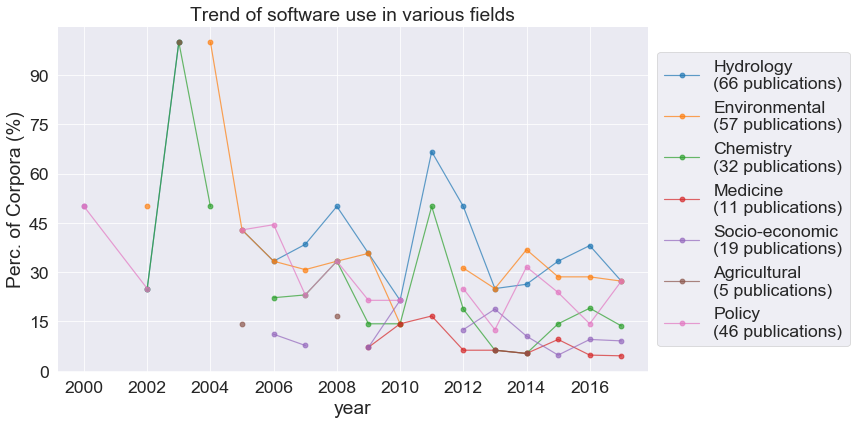

In [93]:
all_water.name = 'Hydrology'
all_enviro.name = 'Environmental'
all_chem.name = 'Chemistry'
all_med.name = 'Medicine'
all_socio_ec.name = 'Socio-economic'
all_agri.name = 'Agricultural'
all_policy.name = 'Policy'

wos_plot.plot_topic_trend([all_water, all_enviro, all_chem, all_med, all_socio_ec, all_agri, all_policy],
                          
                          total_rc=software_rc,
                          title='Trend of software use in various fields',
                          save_plot_fn='{}/software_all_fields_trend.png'.format(FIG_DIR))

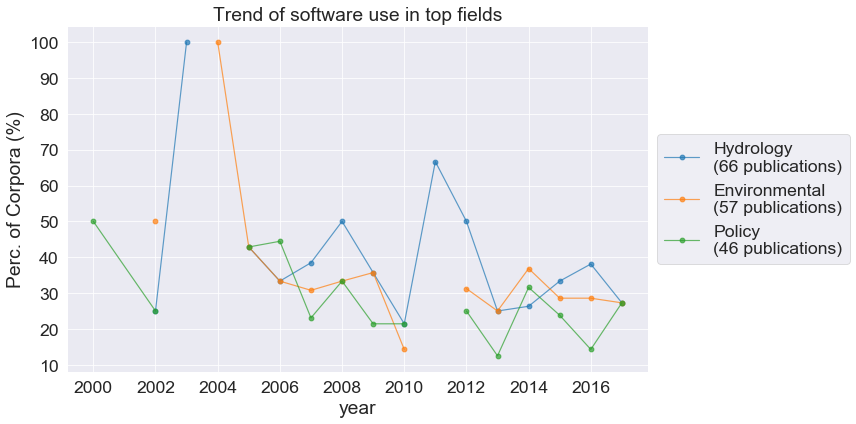

In [96]:
wos_plot.plot_topic_trend([all_water, all_enviro, all_policy],
                          title='Trend of software use in top fields',
                          total_rc=software_rc,
                          save_plot_fn='{}/software_top_fields_trend.png'.format(FIG_DIR))